<a href="https://colab.research.google.com/github/MatthewC00273575/Data-Science/blob/master/K_MeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Load data (download 'Wholesale customers data.csv' from UCI)
data = pd.read_csv('Wholesale customers data.csv')

# Drop non-spending columns (Channel, Region) for clustering
X = data.drop(['Channel', 'Region'], axis=1)  # 6 spending features

# Scale features (K-Means is distance-based)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Samples: {X_scaled.shape[0]}, Features: {X_scaled.shape[1]}")
print(X.head())

Samples: 440, Features: 6
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185


In [ ]:
from sklearn.cluster import KMeans

# Baseline K-Means with k=3 (arbitrary start)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Silhouette score to evaluate (higher = better clusters)
from sklearn.metrics import silhouette_score
print(f"Silhouette Score (k=3): {silhouette_score(X_scaled, labels):.3f}")

Silhouette Score (k=3): 0.458


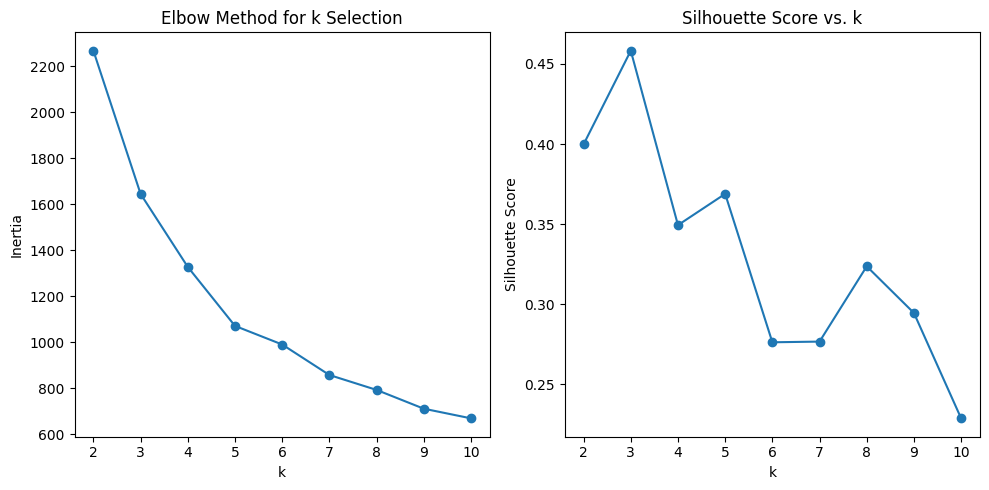

Best k (by silhouette): 3, Score: 0.458


In [ ]:
import matplotlib.pyplot as plt

# Test k from 2 to 10
inertias = []
sil_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)  # Sum of squared distances to centroids
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, marker='o')
plt.xlabel('k'); plt.ylabel('Inertia')
plt.title('Elbow Method for k Selection')

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_values, sil_scores, marker='o')
plt.xlabel('k'); plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. k')
plt.tight_layout()
plt.show()

# Pick best k (highest silhouette or elbow point)
best_k = k_values[np.argmax(sil_scores)]
print(f"Best k (by silhouette): {best_k}, Score: {max(sil_scores):.3f}")

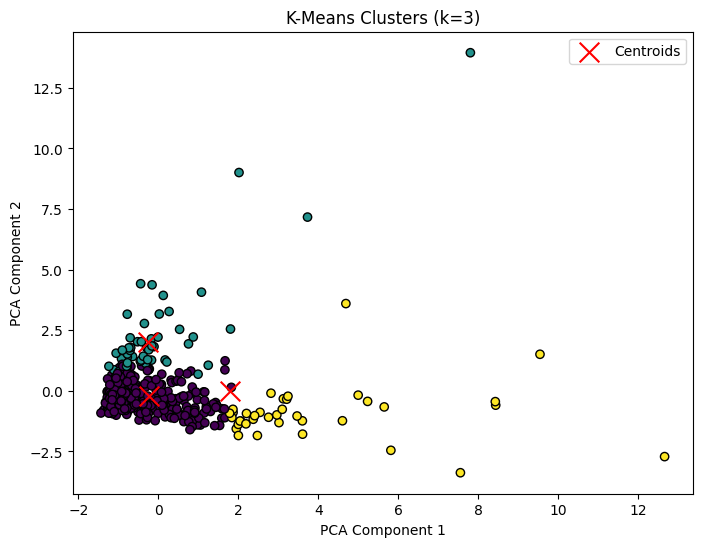

Explained variance ratio: 0.725


In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2D
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_best, cmap='viridis', edgecolors='k')
plt.scatter(kmeans_best.cluster_centers_[:, 0], kmeans_best.cluster_centers_[:, 1],
            c='red', marker='x', s=200, label='Centroids')
plt.xlabel('PCA Component 1'); plt.ylabel('PCA Component 2')
plt.title(f'K-Means Clusters (k={best_k})')
plt.legend()
plt.show()

print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum():.3f}")
# Expected: ~0.6-0.7 variance captured

          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.282857  2.534286   8935.500000   4228.528571   5848.034286   
1        1.113208  2.698113  34540.113208   5860.358491   6122.622642   
2        2.000000  2.405405   8704.864865  20534.405405  30466.243243   

              Frozen  Detergents_Paper   Delicassen  
Cluster                                              
0        2167.231429       1913.605714  1102.120000  
1        9841.735849        981.471698  3664.245283  
2        1932.621622      14758.837838  2459.351351  


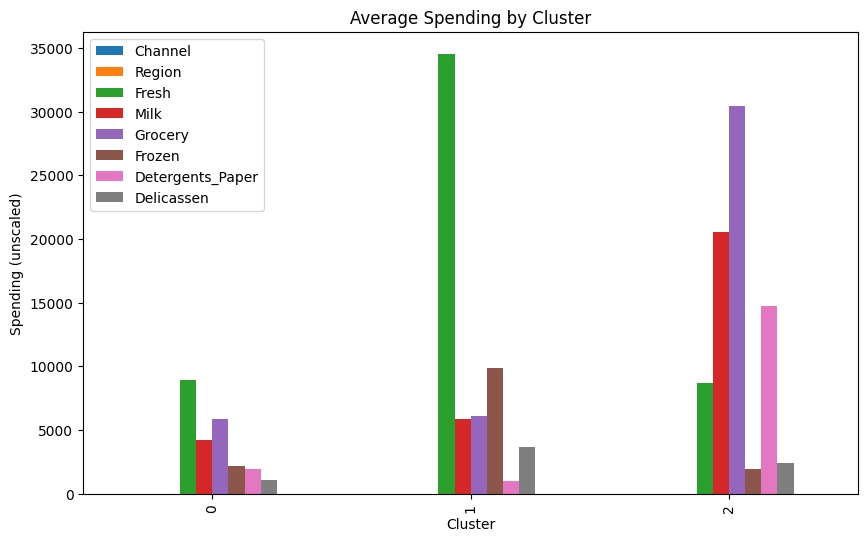

In [ ]:
# Add labels to original data
data['Cluster'] = labels_best

# Mean spending per cluster
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

# Simple bar plot for interpretation
cluster_means.plot(kind='bar', figsize=(10, 6))
plt.title('Average Spending by Cluster')
plt.ylabel('Spending (unscaled)')
plt.show()